In [5]:
source('../../../../source/basic.r')

In [33]:
source('../../../validataion.r')

# read data

In [9]:
datafr.all<- qread('../../datafr/bins2k.datafr.qs')

In [10]:
metadata <- read.table('../../raw_data/input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

# run functions

## all features

In [15]:
psize(10,10)

In [14]:
res.all=fun_all(datafr.all,plot.hist = FALSE)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.5 GiB"
3.07576269308726



## top 5K HVFs

In [60]:
df <- res.all$tf_idf_counts%>%as.matrix%>%as.data.frame

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.5 GiB"


In [61]:
rownames(df) <- res.all$ncounts.nosex %>% rownames

In [62]:
df.vars=df%>%.[rowSums(.)>0,]%>%apply(1,var)
df.means=df%>%.[rowSums(.)>0,]%>%apply(1,mean)

df.plot <- df.vars%>%cbind(df.means)%>%as.data.frame%>%rename_with(~c('var','mean'))

In [63]:
psize()

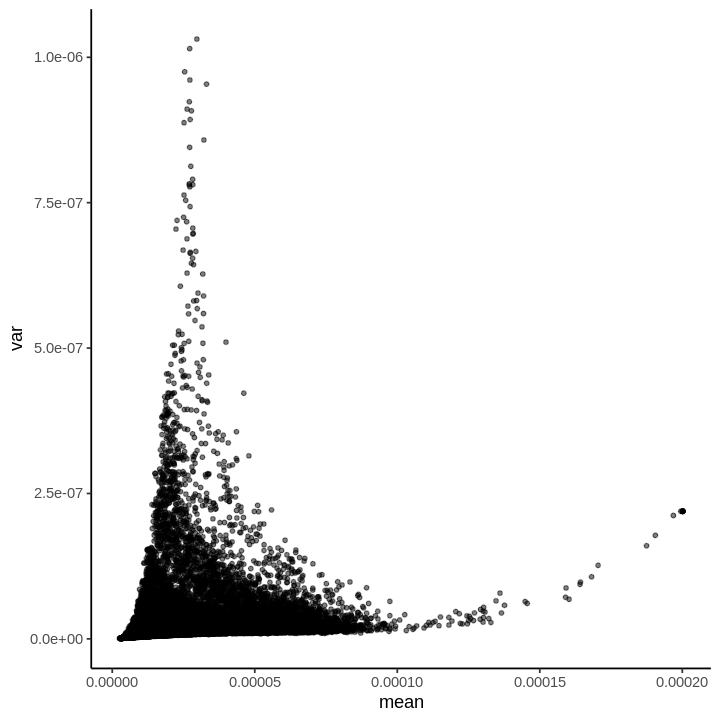

In [64]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [65]:
df.plot <- df.plot%>%mutate(rank.var=base::rank(plyr::desc(var)),
                            rank.mean=base::rank(plyr::desc(mean)),
                            labels=ifelse(rank.var<5000,ifelse(mean>0.2e-4,'variable','non-variable'),'non-variable'))

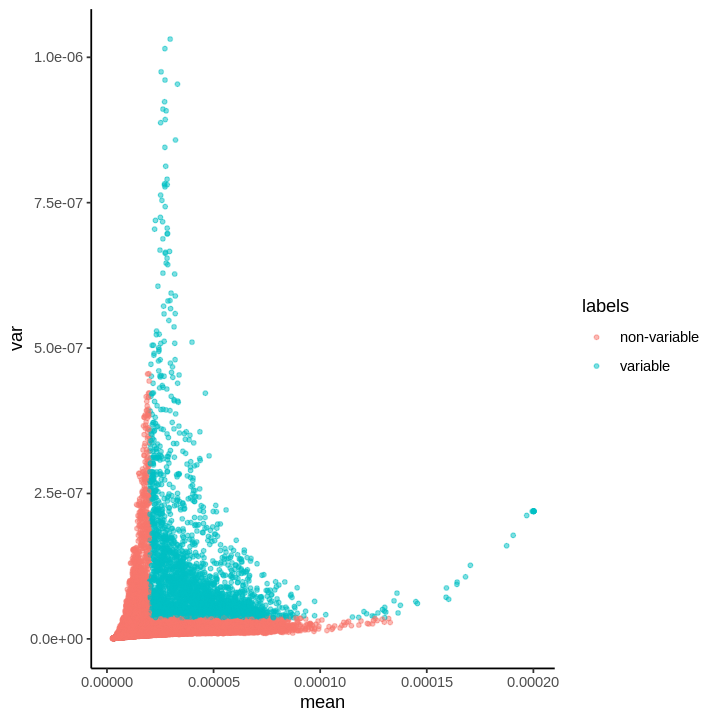

In [66]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(aes(color=labels),cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [67]:
select.peaks <- df.plot%>%filter(labels=='variable')%>%rownames

In [71]:
# select.peaks %>%qsave('./cpeaks_filteredFeature/bins.top.regions.qs')

In [28]:
res.top=fun_all(datafr.all[select.peaks,],plot.hist = FALSE)

10.6419610977173



## top 50K HVFs

In [15]:
df <- res.all$tf_idf_counts%>%as.matrix%>%as.data.frame

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.5 GiB"


In [16]:
rownames(df) <- res.all$ncounts.nosex %>% rownames

In [17]:
df.vars=df%>%.[rowSums(.)>0,]%>%apply(1,var)
df.means=df%>%.[rowSums(.)>0,]%>%apply(1,mean)

df.plot <- df.vars%>%cbind(df.means)%>%as.data.frame%>%rename_with(~c('var','mean'))

In [18]:
psize()

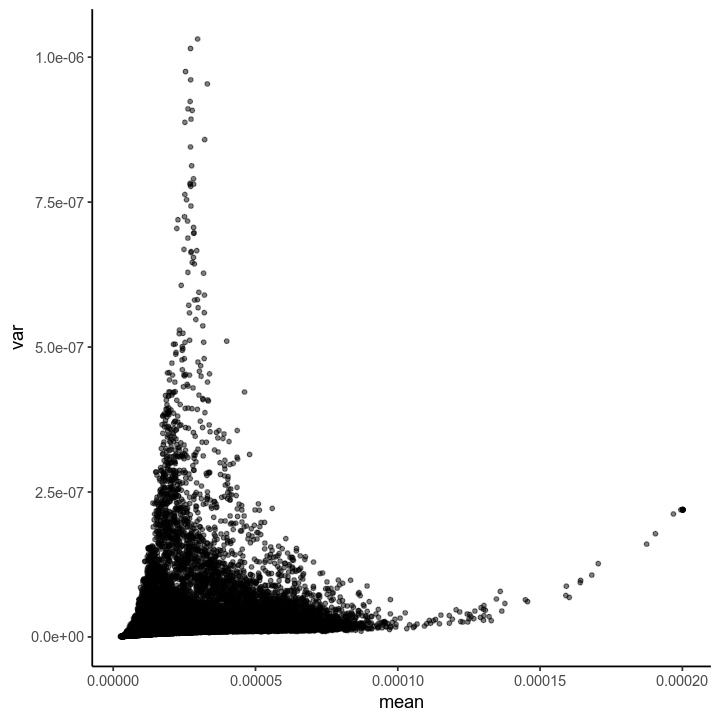

In [19]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [20]:
df.plot <- df.plot%>%mutate(rank.var=base::rank(plyr::desc(var)),
                            rank.mean=base::rank(plyr::desc(mean)),
                            labels=ifelse(rank.var<50000,ifelse(mean>0.1e-4,'variable','non-variable'),'non-variable'))

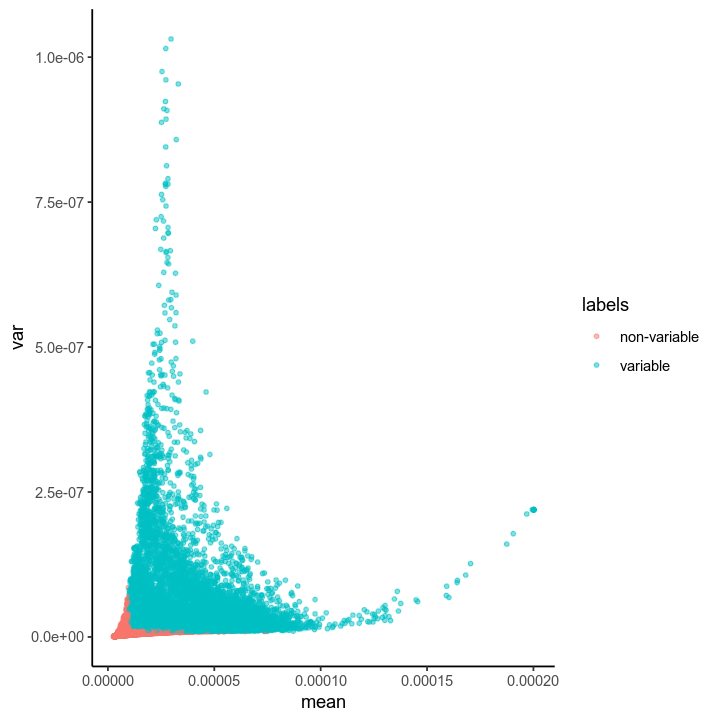

In [21]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(aes(color=labels),cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [22]:
select.peaks <- df.plot%>%filter(labels=='variable')%>%rownames

In [23]:
select.peaks %>%qsave('../../cpeaks_filteredFeature/bins2.top.regions.qs')

In [25]:
res.top2=fun_all(datafr.all[select.peaks,],plot.hist = FALSE)

46.6942245960236



# plots

In [38]:
psize(12,2.2)

In [39]:
plot.list <- c()

In [ ]:
plot.list[['all']]=fun_densityClust(res = res.all,labels=metadata[,'label'],title='all')
plot.list[['top']]=fun_densityClust(res = res.top,labels=metadata[,'label'],title='top',
                   rho_=5,delta_=5)
plot.list[['top2']]=fun_densityClust(res = res.top2,labels=metadata[,'label'],title='top',
                   rho_=5,delta_=5)

In [ ]:
pdf('data1_HSC/plots/bins.pdf',width = 12,height = 2)
plot.list%>%lapply(function(x){grid.arrange(x$plot$plot.clusterNum,
                            x$plot$plot.tsne.cluster,
                            x$plot$plot.umap.cluster,
                           x$plot$plot.tsne.label+theme(legend.position = 'none'),
                           x$plot$plot.umap.label+theme(legend.position = 'none'),ncol=5)})
dev.off()

In [46]:
rds.list <- list(
    res.all=res.all,
    res.top=res.top,
    res.top2=res.top2
                )

In [ ]:
rds.list%>%names%>%lapply(function(x){
    
    saveRDS(rds.list[[x]]$df_out,file = paste0('./rds/FM_bins-',gsub('\\.','-',x),'_data1.rds'))
    
})